# Exercício 1
Construa uma função que determine qual é a coluna vencedora. Para cada linha da matriz entrada esta função atribui valor igual a um para o maior elemento da linha e zero para o menor elemento. Em caso de valores iguais, a primeira coluna recebe valor igual a um e a segunda coluna valor igual a zero. A função deve ser construída de forma a suportar matrizes de entrada de qualquer dimensão (n x m).

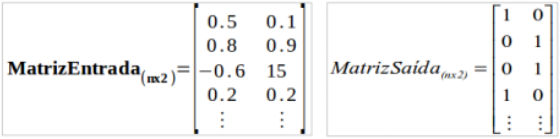

In [1]:
function matrix_winner(array::AbstractArray{<:Number,2})
    result = copy(array)

    max = argmax(array, dims=2)
    min = argmin(array, dims=2)
    
    # Caso existam elementos iguais definir a segunda coluna como perdedor.
    for i in eachindex(max)
        min[i] = max[i] == min[i] ? CartesianIndex(i, 2) : min[i]
    end
    
    result[max] .= 1.0
    result[min] .= 0.0

    result
end

matrix_winner (generic function with 1 method)

In [5]:
matrix_ex1 = [0.5 0.1; 
              0.8 0.9; 
              -0.6 15;
              0.2 0.2]

4×2 Matrix{Float64}:
  0.5   0.1
  0.8   0.9
 -0.6  15.0
  0.2   0.2

In [6]:
matrix_winner(matrix_ex1)

4×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0
 0.0  1.0
 1.0  0.0

# Exercício 2
Dada a matriz M = [5 10 -5 22; 1 33 15 3; 8 29 12 1; 3 11 39 20]; substitua os 3 maiores elementos por zero.

In [4]:
function matrix_changer(array::AbstractArray{<:Number,2}, n::Number)
    # Iniciando variáveis
    newArray = copy(array)
    bigNumbers = Array{CartesianIndex{2}}(undef, n)
    min = -Inf
    for i = 1:n
        # Achando o maior elemento do array e substituindo ele pelo menor
         bigNumbers[i] = findfirst(isequal(maximum(newArray)), newArray)
         newArray[bigNumbers[i]] = min
    end

    # Substituindo os maiores por 0
    newArray[bigNumbers] .= 0
    return newArray
end

matrix_changer (generic function with 1 method)

In [7]:
matrix_ex2 = [5 10 -5 22;
              1 33 15 3; 
              8 29 12 1; 
              3 11 39 20]

4×4 Matrix{Int64}:
 5  10  -5  22
 1  33  15   3
 8  29  12   1
 3  11  39  20

In [8]:
matrix_changer(matrix_ex2, 3)

4×4 Matrix{Int64}:
 5  10  -5  22
 1   0  15   3
 8   0  12   1
 3  11   0  20

# Exercício 3
Crie uma função que receba uma matriz com valores aleatórios e torne a média e o desvio padrão de cada coluna iguais a zero e a um, respectivamente.

In [2]:
using Statistics

function matrix_transformer(array::AbstractArray{<:Number,2})
    # Iniciando variáveis
    rows, cols = size(array)
    newArray = zeros(rows, cols)

    for i = 1:cols
        # Calculando media e desvio padrão
        colMean = mean(array[:, i])
        colStd = std(array[:, i])


        # Impossibilitando erro de divisão por 0
        if colStd == 0 colStd = 1 end

        # Calculo para transformar a matrix em media 0 e desvio padrão 1
        newArray[:, i] = (array[:, i] .- colMean) ./ colStd
    end

    return newArray
end

matrix_transformer (generic function with 1 method)

In [4]:
matrix_ex3 = [5 10 -5 22;
              1 33 15 3; 
              8 29 12 1; 
              3 11 39 20]

4×4 Matrix{Int64}:
 5  10  -5  22
 1  33  15   3
 8  29  12   1
 3  11  39  20

In [13]:
result = matrix_transformer(matrix_ex3)
print("Mean: " * string(mean(result, dims=1)) * "\n")
print("Std: " * string(std(result, dims=1)) * "\n")
result

Mean: [-2.7755575615628914e-17 -2.7755575615628914e-17 0.0 0.0]
Std: [1.0 0.9999999999999999 1.0 1.0]


4×4 Matrix{Float64}:
  0.251166  -0.899222  -1.11769     0.951927
 -1.08838    1.0247    -0.0137987  -0.770607
  1.25583    0.690101  -0.179383   -0.951927
 -0.418609  -0.815574   1.31087     0.770607

# Exercício 4
Faça uma amostragem de tamanho 500 do intervalo –2 a 2 uniformemente distribuída calcule o seno, o coseno, 1/seno e 1/coseno, e, utilizando as funções plot e subplot mostre os gráficos das funções das seguintes formas: todos juntos no mesmo par de eixos (plot) e separados na mesma janela (subplot). Código e o plot.

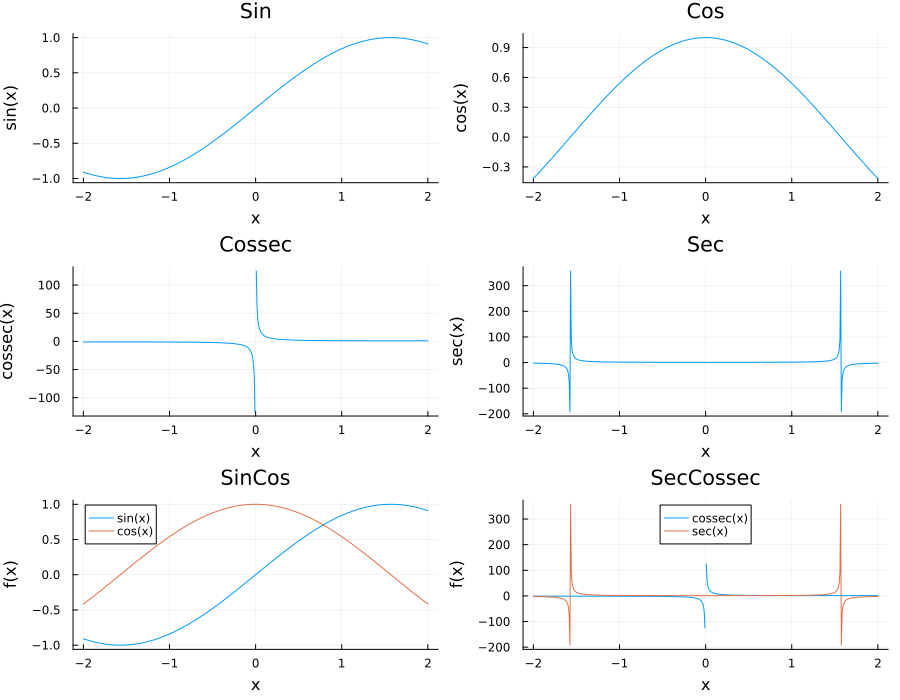

In [69]:
using Plots

start = -2
final = 2
len = 500

# Gerando array
array = [i for i = start:(final - start) / len:final]

# Passando as funções no array
_sin = sin.(array)
_cos = cos.(array)
_cossec = csc.(array)
_sec = sec.(array)

# Criando cada plot separado
p1 = plot(array, _sin, title = "Sin", xlabel = "x", ylabel = "sin(x)", legend = false)
p2 = plot(array, _cos, title = "Cos", xlabel = "x", ylabel = "cos(x)", legend = false)
p3 = plot(array, _cossec, title = "Cossec", xlabel = "x", ylabel = "cossec(x)", legend = false)
p4 = plot(array, _sec, title = "Sec", xlabel = "x", ylabel = "sec(x)", legend = false)

# Criando do sen e cos juntos
p5 = plot(array, _sin, title = "SinCos", xlabel = "x", ylabel = "f(x)", label="sin(x)", legend = :best)
p5 = plot!(array, _cos, label="cos(x)")

# Criando do cossec e sec juntos
p6 = plot(array, _cossec, title = "SecCossec", xlabel = "x", ylabel = "f(x)", label = "cossec(x)", legend = :top)
p6 = plot!(array, _sec, label = "sec(x)")

p7 = plot(array, _sin, title = "All", xlabel = "x", ylabel = "f(x)")
p7 = plot!(array, _cos)
p7 = plot!(array, _cossec)
p7 = plot!(array, _sec)

# Plotando todos
plot(p1, p2, p3, p4, p5, p6, layout = (3, 2), size = (900, 700))

# Exercício 5
Gere um conjunto de 100 instâncias que segue uma distribuição normal com média 20 e com desvio padrão 5 e plot o gráfico. Código e o plot.

Distribuição: Normal{Float64}(μ=20.0, σ=5.0)

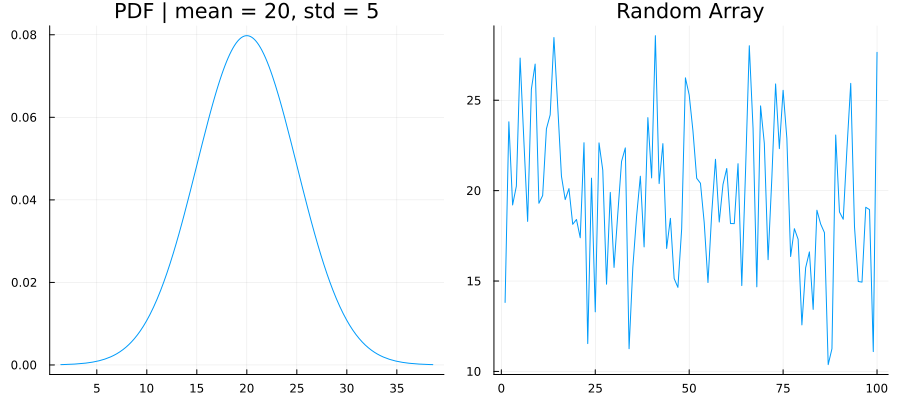

In [68]:
using Plots, Distributions, StatsPlots

d = Normal(20, 5)
print("Distribuição: " * string(d))

# Gerando array de 100 elementos com distribuição normal de média 20 e desvio padrão 5
array = rand(d, 100)::AbstractArray

p1 = plot(d, title="PDF | mean = 20, std = 5", legend = false)
p2 = plot(array, title="Random Array", legend = false)

plot(p1,p2, size=(900, 400))


# Exercício 6
Em operações de filtragem do domínio da frequência utiliza-se a função de transferência, geralmente representada por uma matriz contendo valores que determinam o objetivo do filtro. Construa uma função com a assinatura abaixo que retorne a função de transferência desejada, conforme indica a Figura 1, sem a utilização de laços de repetição.

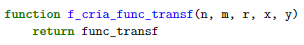

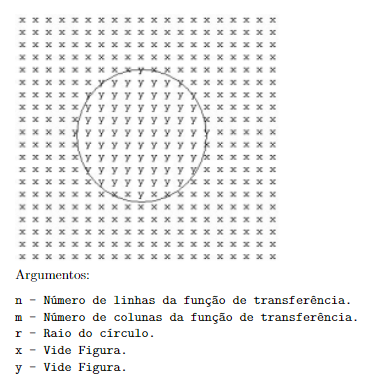

In [69]:
function f_cria_func_transf(n, m, r, x, y)
    # Getting the center of the image
    get_center(length) = length % 2 == 0 ? n / 2 : round(Int, n / 2) + 1
    center_x = get_center(n)
    center_y = get_center(m)
  
    # Creating the function to generate the circle
    set_circle(index) = (center_x - index[1])^2 + (center_y - index[2])^2 <= r^2 ? y : x
  
    # Creating the matrix
    matrix = fill(x, (n, m))
  
    # Getting all index
    g_index = findall(isequal(x), matrix)
  
    # Setting the y
    matrix[g_index] .= set_circle.(g_index)
  
    return matrix
  end

f_cria_func_transf (generic function with 1 method)

In [75]:
f_cria_func_transf(20,20, 5, 1, 0)

20×20 Matrix{Int64}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  0  0  0  0  0  0  0  1  1  1  1  1  1  1
 1  1  1  1  1  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1
 1  1  1  1  1  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1
 1  1  1  1  1  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1
 1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1
 1  1  1  1  1  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1
 1  1  1  1  1  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1
 1  1  1  1  1  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1
 1  1  1  1  1  1  0  0  0  0  0  0  0  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  